# Project: Investigate a Dataset - [tmdb_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

<br>This data set contains information about 4,803 movies collected from The Movie Database (TMDb), including user ratings, revenue,etc.. with 20+ features
<br>And its columns categorized into:</br>
><li>budget: Money spent to product the Movie</li>
><li>genres: Type of the Movie like: romantic,dramaa..</li>
><li>homepage: Official link of the Movie</li>
><li>id: id of the Movie in the database</li>
><li>keywords: Keywords used to help in the search for the Movie</li>
><li>original_language: Original Language used in the Movie's audio </li>
><li>original_title: Original Movie name</li>
><li>overview: Description of the Movie</li>
><li>popularity: how popular the movie is among the audience</li>
><li>production_companies: Company product the Movie</li>
><li>production_countries: Country at which the Movie is producted</li>
><li>release_date:Date where the Movie released</li>
><li>revenue: Revenue money from Box Office</li>
><li>runtime: Duration of the Movie</li>
><li>spoken_languages: Languages spoken in the Movie</li>
><li>status: Movie Status if Released,Rumored,Post Production</li>
><li>tagline</li>
><li>title</li>
><li>vote_average:Average of votes for the movie</li>
><li>vote_count: number of people voted</li>
</br>
### Question(s) for Analysis
#### 1)Classify the most used genre at current year
#### 2)Analysing the Runtime for every movie
#### 3)Relation between budget and revenue of the movie

### Setting up our environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> We will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.


### General Properties
> Let us read our csv file and explore it before starting</br>

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
#Below there I used this code to expand all columns
pd.set_option('display.max_columns', None)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Ooh! Our "genres","keywords",.. columns are categorized in list of dictionaries. Don't worry, I will handle this 

In [3]:
df.shape

(4803, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

We could see we got some null values which we will drop in next steps and handle them

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Here is all null values we got,but first we will take undesirable values

In [6]:
df.duplicated().sum()

0

Fortunately ,we got no duplicated values

### Some Observations we noticed
 >We have some columns are written in form of list of dictionaries
<br> The (budget and revenue)'s currency isn't specified</br>


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
<br>1) We will drop the undesirable values like 'homepage','id','keywords','overview','production_countries','tagline'.</br>
<br>2) We will drop the values which have zeroes value like budget,revenue,runtime..</br>
<br>3) Dealing with release_date as datetime value not int, So we will change it</br>
<br>4) Extracting the wanted values from list of dictionaries we faced</br>

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(columns=['homepage','id','keywords','overview','production_countries','tagline'],axis = 1,inplace= True)
df

,budget,genres,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avengers: Age of Ultron,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Harry Potter and the Half-Blood Prince,98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Batman v Superman: Dawn of Justice,155.790452,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""A...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004


Above there, We perform first step of data cleaning.

In [8]:
#we will remove zeroes value in 'budget'
df.drop(df.query('budget == 0').index,inplace=True)
#we will remove zeroes value in 'revenue'
df.drop(df.query('revenue == 0').index,inplace=True)
#we will remove zeroes value in 'runtime'
df.drop(df.query(' runtime == 0').index,inplace=True)

Above there, We cleaned our dataset from zeroes values and empty values

In [9]:
#changing 'released_date' format
df.release_date = pd.to_datetime(df.release_date)
df.dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

We changed the 'released_date' to datetime format

In [10]:
#we extracted the genres from 'name' key in the dictionary
#then we joined them with "," 
#eval method ease for us accessing the values of obj
df['genres'] = df['genres'].apply(lambda x: ",".join([i['name'] for i in eval(x)]))

In [11]:
#remove empty values from genres
df.drop(df.query('genres==""').index,inplace=True)

Woah! This was exhausting but we must do it to help us with our questions 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 0 to 4798
Data columns (total 14 columns):
budget                  3228 non-null int64
genres                  3228 non-null object
original_language       3228 non-null object
original_title          3228 non-null object
popularity              3228 non-null float64
production_companies    3228 non-null object
release_date            3228 non-null datetime64[ns]
revenue                 3228 non-null int64
runtime                 3228 non-null float64
spoken_languages        3228 non-null object
status                  3228 non-null object
title                   3228 non-null object
vote_average            3228 non-null float64
vote_count              3228 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 378.3+ KB


In [13]:
df.head(7)

,budget,genres,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"Fantasy,Action,Adventure",en,Spider-Man 3,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"Animation,Family",en,Tangled,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Classify the most used genre at current year)

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def genres(year):
    #creating an empty list to store Genres
    data = []
    #looping around inputed year
    for i in df.query('release_date >= "{}" & release_date <"{}"'.format(year,year+1)).genres:
        #filling the list with all genres
        data.extend(i.split(sep= ","))
    #putting it as Series Frame to use its magic
    data_series = pd.Series(data)
    #counting every genre descendingly
    count = data_series.value_counts(ascending=False)
    #printing count of every genre in specific year
    print(count)
    
    #Visualizing the counts
    count_plt = count.plot(y="No. of Movies",kind="bar",title ="The most popular genres of {}s".format(year))
    count_plt.set_ylabel("No. of Movies")
    count_plt.set_xlabel("Genres")
    plt.show()

Drama              70
Comedy             63
Thriller           54
Action             50
Adventure          27
Family             23
Romance            22
Science Fiction    22
Crime              20
Horror             17
Animation          14
Fantasy            14
Mystery            12
History             6
War                 6
Music               4
Documentary         3
Western             1
dtype: int64


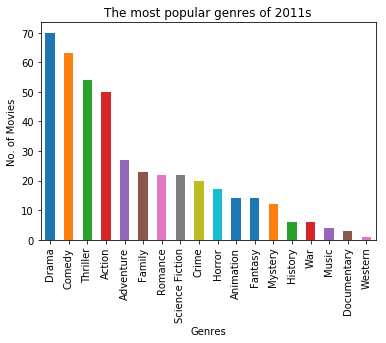

In [15]:
genres(2011)

As we could see right here that "Drama" was leading "2011" followed by "Comedy" and "Thriller"

### Research Question 2  (Analysing the Runtime for every movie)

In [16]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#giving the figure size(width, height)
def runtime_records(field):
    plt.figure(figsize=(15,5))
    #Title of the graph
    plt.title('Runtime (all the movies)')
    #label on X-axis
    plt.xlabel('Duration of the Movies')
    #label on Y-axis
    plt.ylabel('Noumber of Movies in our Dataset')


    #giving a histogram plot
    plt.hist(df[field], rwidth = 0.7, bins =50)
    #displays the plot
    plt.show()

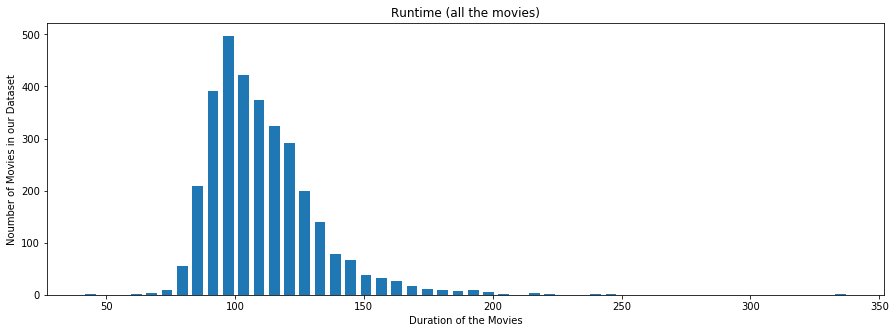

In [17]:
runtime_records("runtime")

Mmm.. 90-99 min is the most popular duration for the movie in all of our dataset

### Research Question 3  (Relation between budget and revenue of the movie)

In [18]:
def scatter_plot(feature1,feature2):    
    #setting up x-axis name
    plt.xlabel("{} of the movie (x10^8)".format(feature1.name))
    #setting up y-axis name
    plt.ylabel("{} of the movie (x10^9)".format(feature2.name))
    #setting up the title of the graph
    plt.title("Relation between {} and {}".format(feature1.name,feature2.name))
    
    #Scattering the relation
    plt.scatter(feature1,feature2,s=20,c="red")
    plt.show

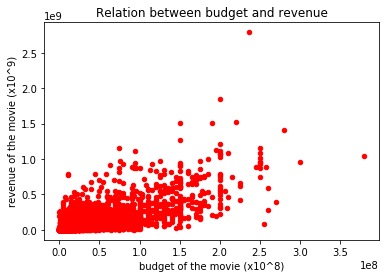

In [19]:
scatter_plot(df['budget'],df['revenue'])

Mhmmm..., As we noticed it seems that we have **positive colorelation** right here,The budget increases, so the revenue increases
<br>You might noticed those outliers. But here we couldn't just get rid of them as it indicate a movie which have a much higher revenue than its budget.</br>

> **Tip** Value of the budget is (x10^8) while value of the revenue is (x10^9)

<a id='conclusions'></a>
## Conclusions

### We reach the final of the project,let's conclude some of what we saw:
> We had seen that "Drama" was leading in that specific year (from Q1)

> The avg duration of the movie ranged from 90 - 99 min that's why the audience don't get bored (from Q2)

>The budget increases, so the revenue increases 

### Limitaion
> We face that genres column issue which we had to extract them from that list of dictionries, Whatever there can't be a movie which can take all that value of genres. As the budget and revenue weren't specified with certain currency but it doesn't matter we didn't use them in our analysis

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0